In [1]:
import torch

x = torch.Tensor([1, 2, 3])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda')

In [3]:
print(x)
x = x.to(device)
print(x)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


In [6]:
# Perceptron

X = torch.Tensor([1, 170, 100])
W = torch.Tensor([-120, 0.5, 0.5])

In [7]:
X@W

tensor(15.)

In [8]:
def step(u):
    if u >= 0:
        return 1
    else:
        return 0

In [9]:
step(X@W)

1

In [13]:
# Train
X = torch.Tensor([[1, 170, 100], [1, 180, 55], [1, 160, 70], [1, 170, 70], [1, 145, 60]])
y = torch.Tensor([1, 0, 1, 0, 1])   # 1. fat
## normalize
def normalize(X):  # min-max-normalize
    x_max = X.max()
    x_min = X.min()
    return (X - x_min + 1.0) / (x_max - x_min + 1.0)

print(X[:, 1])
print(X[:, 2])
normalized_h = normalize(X[:, 1])
normalized_w = normalize(X[:, 1])
print(X.shape)

tensor([170., 180., 160., 170., 145.])
tensor([100.,  55.,  70.,  70.,  60.])
torch.Size([5, 3])


In [16]:
X_normalized = torch.Tensor([[i.item(), j.item(), k.item()] for i,j,k in zip(X[:, 0], normalized_h, normalized_w)])
X_normalized

tensor([[1.0000, 0.7222, 0.7222],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 0.4444, 0.4444],
        [1.0000, 0.7222, 0.7222],
        [1.0000, 0.0278, 0.0278]])

In [17]:
X

tensor([[  1., 170., 100.],
        [  1., 180.,  55.],
        [  1., 160.,  70.],
        [  1., 170.,  70.],
        [  1., 145.,  60.]])

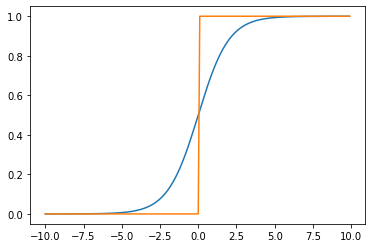

In [21]:
# Activation Func
import torch.nn as nn
import torch

def step(X):
    return (X >= 0).type(torch.int)

sigmoid = nn.Sigmoid()
X = torch.arange(-10, 10, 0.1)
y = sigmoid(X)
import matplotlib.pyplot as plt
plt.plot(X, y)
plt.plot(X, step(X))
plt.show()

In [28]:
# Loss function
import torch
import torch.nn as nn

loss_fn = nn.BCELoss()

X = torch.Tensor([[1, 170, 100], [1, 180, 55], [1, 160, 70], [1, 170, 70], [1, 145, 60]])
y = torch.Tensor([1, 0, 1, 0, 1])   # 1. fat

W = torch.randn((3, 1), requires_grad=True)
y_pred = sigmoid(X@W)
loss_fn = (y_pred, y.view_as(y_pred))   # view_as で次元を合わせる

## Gradient Descent

1. Initialize the gradient
1. Make Prediction
1. Calculate loss
1. Calculate differenciation
    * requires_grad
1. Update weights
1. Record loss history

In [25]:
import torch
import torch.nn

In [42]:
X = torch.Tensor([[1, 170, 100], [1, 180, 55], [1, 160, 70], [1, 170, 70], [1, 145, 60]])
y = torch.Tensor([1, 0, 1, 0, 1])   # 1. fat

def normalize(X):  # min-max-normalize
    x_max = X.max()
    x_min = X.min()
    return (X - x_min + 1.0) / (x_max - x_min + 1.0)

print(X[:, 1])
print(X[:, 2])
normalized_h = normalize(X[:, 1])
normalized_w = normalize(X[:, 2])
X_normalized = torch.Tensor([[i.item(), j.item(), k.item()] for i,j,k in zip(X[:, 0], normalized_h, normalized_w)])

W = torch.randn((3, 1), requires_grad=True)
y_pred = sigmoid(X@W)
loss_fn = (y_pred, y.view_as(y_pred))   # view_as で次元を合わせる

epochs = 300
eta = 0.5

tensor([170., 180., 160., 170., 145.])
tensor([100.,  55.,  70.,  70.,  60.])


In [43]:
losses = []
loss_fn = nn.BCELoss()

for epoch in range(epochs):
    W.grad = None
    y_pred = sigmoid(X_normalized@W)
    # print(y)
    loss = loss_fn(y_pred, y.view_as(y_pred))
    loss.backward()
    W.data = W.data - eta * W.grad
    losses.append(loss)


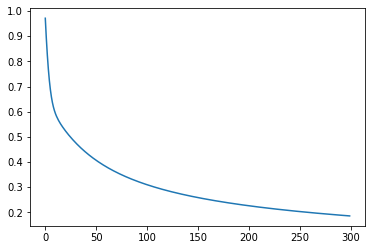

In [44]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [40]:
joshua = torch.Tensor([[1, 180, 55]])

In [49]:
# １つのデータだと、正規化したときに [1,1] になってしまうので、以下のようにする
# min-max は train のデータを使うと思ってもいいかも
X_new = torch.cat([X, joshua.reshape(1,3)])

def normalize_array(X):
    normalized_h = normalize(X[:, 1])
    normalized_w = normalize(X[:, 2])
    X_normalized = torch.Tensor([[i.item(), j.item(), k.item()] for i,j,k in zip(X[:, 0], normalized_h, normalized_w)])
    return X_normalized

X_new_normalized = normalize_array(X_new)

In [52]:
'fat' if sigmoid(X_new_normalized[-1, :]@W) >= 0.5 else 'not fat'

'not fat'